In [30]:
# These two lines ensure that we always import the latest version of a package, in case it has been modified.
%load_ext autoreload
%autoreload 2

import timm
import torch
import detectors
from utils import vis as vis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import os
from tqdm import tqdm

from data_utils.data_stats import *
from models.networks import get_model
from data_utils.dataloader import get_loader
from data_utils.dataset_to_beton import get_dataset

In [32]:
# define important parameters

dataset         = 'cifar10'               # One of cifar10, cifar100, stl10, imagenet or imagenet21
num_classes     = CLASS_DICT[dataset]
data_path       = '/scratch/ffcv'
model_path      = '/scratch/zooming_in_on_mlps'
eval_batch_size = 32
data_resolution = 32 
checkpoint      = None


#model_type      = 'mlp'                   
#checkpoint      = 'in21k_cifar10'       
#architecture    = 'B_12-Wi_1024'        
#crop_resolution = 64            

#model_type      = 'cnn'               
#architecture    = 'resnet18_' + dataset                      
#crop_resolution = 32

model_type      = 'vit'                  
architecture    = 'vit_small_patch16_224_' + dataset + '_v7.pth'        
crop_resolution = 224 

In [33]:
def get_models_full(model_type, 
                    architecture, 
                    resolution  = crop_resolution, 
                    num_classes = CLASS_DICT[dataset], 
                    checkpoint  = checkpoint, 
                    model_path   = model_path):
    if model_type == 'mlp':
        model = get_model(architecture=architecture, resolution = resolution, 
                          num_classes=num_classes,checkpoint= checkpoint)
    elif model_type == 'cnn':
        model = timm.create_model(architecture, pretrained=True)
    elif model_type == 'vit':
        model = torch.load(os.path.join(model_path, architecture))
    return model

In [ ]:
# load the models
torch.backends.cuda.matmul.allow_tf32 = True
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = get_models_full(model_type, architecture)
with torch.no_grad():
    model.eval()

Reached 0.9987446069717407 confidence score in epoch 6. Stopping early.


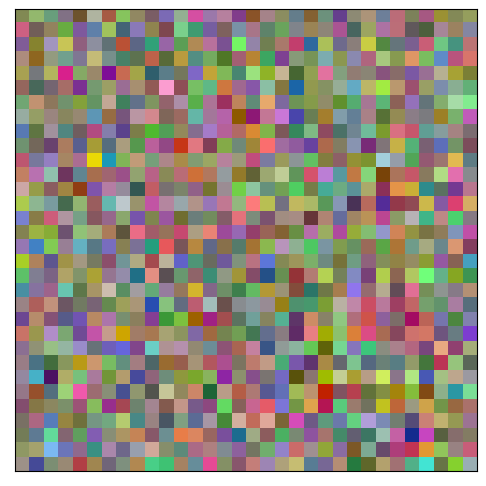

In [29]:
# generate image

synthetic_image = vis.generate_image(model        = model, 
                                     target_class = 0,
                                     epochs       = 10, 
                                     min_prob     = 0.9, 
                                     lr           = 2, 
                                     weight_decay = 5e-2, 
                                     step_size    = 100, 
                                     gamma        = 0.9,
                                     noise_size   = crop_resolution,
                                     model_type   = model_type)

